<a href="https://colab.research.google.com/github/hssitja/PhD-Dissertation/blob/Chapter-3/Chapter3_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [822]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
# plt.style.use(['science', 'notebook', 'grid'])
plt.style.available
%matplotlib inline
import scipy as sp
import sympy as smp
from sympy import Piecewise, And, lambdify, symbols, plot, plot_implicit
from sympy.stats import Beta, density, P, E, variance, cdf, Kumaraswamy
from sympy.plotting.plot import Plot
from scipy.stats import beta

In [823]:
T, x_r, x_l = smp.symbols('T x_r x_l', Dummy = True)

In [824]:
A_r, A_l, W, mu, p, qtilde, qhat, theta, A_theta, x_theta = smp.symbols('A_r A_l W mu p qtilde qhat theta A_theta x_theta', real = True, positive = True)

In [825]:
# Defining chi as a random variable beta distributed

a, b = smp.symbols('a b', integer = True, positive = True)

z = smp.symbols('z')

a, b = (2,8) # shape parameters for beta distribution

Chi = Beta('chi', a, b)

D = density(Chi)(z)

In [826]:
Chi2 = Kumaraswamy('chi2', 2, 20)
cdf(Chi)(z), cdf(Chi2)(z)

(Piecewise((-z**9/(9*beta(2, 8)) + 7*z**8/(8*beta(2, 8)) - 3*z**7/beta(2, 8) + 35*z**6/(6*beta(2, 8)) - 7*z**5/beta(2, 8) + 21*z**4/(4*beta(2, 8)) - 7*z**3/(3*beta(2, 8)) + z**2/(2*beta(2, 8)), z >= 0), (0, True)),
 Piecewise((0, z < 0), (1 - (1 - z**2)**20, z <= 1), (1, True)))

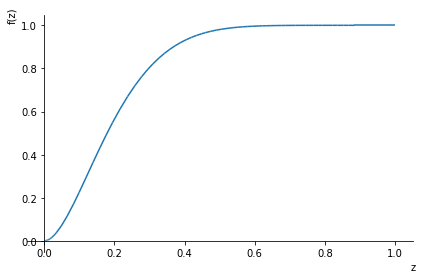

In [827]:
plot(cdf(Chi)(z), (z,0,1))

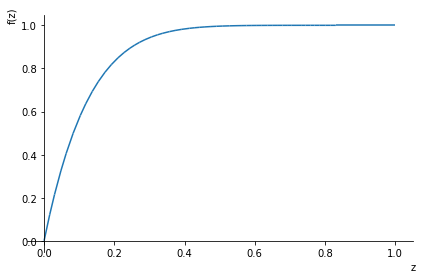

In [828]:
plot(cdf(Beta('chi', 1, 8))(z), (z,0,1))

In [829]:
E(Beta('chi', 1, 8)), E(Beta('chi', 2, 8)), E(Beta('chi', 1, 4))

(1/9, 1/5, 1/5)

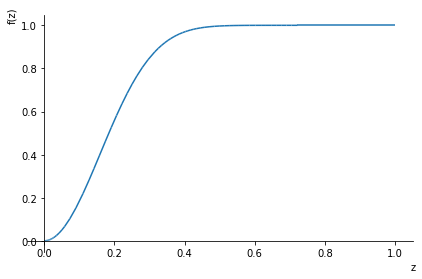

In [830]:
plot(cdf(Chi2)(z), (z,0,1))

In [831]:
f1 = (1-Chi)*mu # votes_r in separating equilibrium x_r = 0 & x_l = 1
f2 = Chi + (1-Chi)*(1-mu) # votes_l in separating equilibrium x_r = 0 & x_l = 1

f3 = Chi + (1-Chi)*(p*mu + (1-p)*(1-mu)) # votes for both types of incumbents in pooling equilibrium x_r = 1 & x_l = 1
f4 = Chi + (1-Chi)*(qhat*mu + (1-qhat)*(1-mu))# votes for both types of incumbents outside pooling equilibrium x_r = 1 & x_l = 1

f5 = (1-Chi)*(p*mu + (1-p)*(1-mu)) # votes for both types of incumbents in pooling equilibrium x_r = 0 & x_l = 0
f6 = (1-Chi)*(qtilde*mu + (1-qtilde)*(1-mu))# votes for both types of incumbents outside pooling equilibrium x_r = 0 & x_l = 0

votes_r = Piecewise((f1, And(x_r < 1, x_l > 0)), (f3, And(x_r > 0, x_l > 0)), (f5, And(x_r < 1, x_l < 1)))
votes_l = Piecewise((f2, And(x_r < 1, x_l > 0)), (f3, And(x_r > 0, x_l > 0)), (f5, And(x_r < 1, x_l < 1)))

In [832]:
votes_l

Piecewise(((1 - mu)*(1 - chi) + chi, (x_l > 0) & (x_r < 1)), ((1 - chi)*(mu*p + (1 - mu)*(1 - p)) + chi, (x_l > 0) & (x_r > 0)), ((1 - chi)*(mu*p + (1 - mu)*(1 - p)), (x_l < 1) & (x_r < 1)))

In [833]:
smp.latex(votes_l)

'\\begin{cases} \\left(1 - \\mu\\right) \\left(1 - \\chi\\right) + \\chi & \\text{for}\\: x_{l} > 0 \\wedge x_{r} < 1 \\\\\\left(1 - \\chi\\right) \\left(\\mu p + \\left(1 - \\mu\\right) \\left(1 - p\\right)\\right) + \\chi & \\text{for}\\: x_{l} > 0 \\wedge x_{r} > 0 \\\\\\left(1 - \\chi\\right) \\left(\\mu p + \\left(1 - \\mu\\right) \\left(1 - p\\right)\\right) & \\text{for}\\: x_{l} < 1 \\wedge x_{r} < 1 \\end{cases}'

In [834]:
smp.latex(votes_r)

'\\begin{cases} \\mu \\left(1 - \\chi\\right) & \\text{for}\\: x_{l} > 0 \\wedge x_{r} < 1 \\\\\\left(1 - \\chi\\right) \\left(\\mu p + \\left(1 - \\mu\\right) \\left(1 - p\\right)\\right) + \\chi & \\text{for}\\: x_{l} > 0 \\wedge x_{r} > 0 \\\\\\left(1 - \\chi\\right) \\left(\\mu p + \\left(1 - \\mu\\right) \\left(1 - p\\right)\\right) & \\text{for}\\: x_{l} < 1 \\wedge x_{r} < 1 \\end{cases}'

\begin{equation}votes_r = \begin{cases} \mu \left(1 - \chi\right) & \text{for}\: x_{l} > 0 \wedge x_{r} < 1 \\\left(1 - \chi\right) \left(\mu p + \left(1 - \mu\right) \left(1 - p\right)\right) + \chi & \text{for}\: x_{l} > 0 \wedge x_{r} > 0 \\\left(1 - \chi\right) \left(\mu p + \left(1 - \mu\right) \left(1 - p\right)\right) & \text{for}\: x_{l} < 1 \wedge x_{r} < 1 \end{cases} \end{equation}

In [835]:
cdf(Chi)(z)

Piecewise((-z**9/(9*beta(2, 8)) + 7*z**8/(8*beta(2, 8)) - 3*z**7/beta(2, 8) + 35*z**6/(6*beta(2, 8)) - 7*z**5/beta(2, 8) + 21*z**4/(4*beta(2, 8)) - 7*z**3/(3*beta(2, 8)) + z**2/(2*beta(2, 8)), z >= 0), (0, True))

In [836]:
cdf(Chi2)(z)

Piecewise((0, z < 0), (1 - (1 - z**2)**20, z <= 1), (1, True))

In [837]:
P(Chi2 < 0.5), P(Chi < 0.5).evalf()

(0.996828788061066, 0.980468749999998)

In [838]:
P(Beta('chi', 1, 4) < 0.5), P(Beta('chi', 1, 8) < 0.5), P(Beta('chi', 2, 8) < 0.5).evalf()

(0.937500000000000, 0.996093750000000, 0.980468749999998)

In [839]:
f = (2*mu - 1)/2*mu

q = smp.symbols('q')

Psi_p = (0.5 - (p*mu + (1-mu)*(1-p)))/(1-(p*mu + (1-mu)*(1-p)))
Psi_q = (2*(q*mu + (1-q)*(1-mu))-1)/(2*(q*mu + (1-q)*(1-mu)))

In [840]:
Psi_p

(-mu*p - (1 - mu)*(1 - p) + 0.5)/(-mu*p - (1 - mu)*(1 - p) + 1)

In [841]:
Psi_q

(2*mu*q + 2*(1 - mu)*(1 - q) - 1)/(2*mu*q + 2*(1 - mu)*(1 - q))

In [842]:
Psi_p.simplify()

(mu*p + (mu - 1)*(p - 1) - 0.5)/(mu*p + (mu - 1)*(p - 1) - 1)

In [843]:
Psi_q.simplify()

(2*mu*q - mu - q + 1/2)/(2*mu*q - mu - q + 1)

In [844]:
Psi_p.cancel()

(2.0*mu*p - 1.0*mu - 1.0*p + 0.5)/(2.0*mu*p - 1.0*mu - 1.0*p)

In [845]:
Psi_q.cancel()

(4*mu*q - 2*mu - 2*q + 1)/(4*mu*q - 2*mu - 2*q + 2)

In [846]:
f.simplify()

mu*(mu - 1/2)

In [847]:
elected_r, elected_l, elected_theta = smp.symbols('elected_r elected_l elected_theta')

In [848]:
Util_r, Util_l = ( (A_r*x_r*(1-T) - A_r*x_r*T) + (A_r*(1-x_r)*T - A_r*(1-x_r)*(1-T) + W*elected_r),
                  (A_l*x_l*(1-T) - A_l*x_l*T) + (A_l*(1-x_l)*T - A_l*(1-x_l)*(1-T) + W*elected_l) )

In [849]:
Util_theta = A_theta*x_theta + W*elected_theta
Util_theta

A_theta*x_theta + W*elected_theta

In [850]:
def function_1(mu):
  return (2*mu - 1)/2*mu

def function_2(mu,p):
  return (0.5 - (p*mu + (1-mu)*(1-p)))/(1-(p*mu + (1-mu)*(1-p)))

def function_3(mu,q):
  return ((2*(q*mu + (1-q)*(1-mu))-1)/(2*(q*mu + (1-q)*(1-mu))))



In [851]:
# basic settings for plots

x = np.linspace(0.01,.99,100)
y = np.linspace(0.01,.99,100)
X, Y = np.meshgrid(x,y)

# Separating eq - x_R = 0, x_L = 1
cond1R = function_1(x)
cond1L = function_1(x)
C1R = 1 - 2*beta.cdf(cond1R, a, b)
C1L = 2*beta.cdf(cond1L, a, b) - 1

# Separating eq2 - x_R = 1, x_L = 0
cond2R = cond1L
cond2L = cond1R
C2R = 2*beta.cdf(cond2R, a, b) - 1
C2L = 1 - 2*beta.cdf(cond2L, a, b)

# Pooling eq - x_R = x_L = 1
# Fixing q
q = 0.6

cond3R = 1 - function_2(X,Y) - function_3(X,q)
cond3L = function_2(X,Y) + function_3(X,q) - 1
C3R = 1 - beta.cdf(function_2(X,Y), a, b) - beta.cdf(function_3(X,q), a, b)
C3L = beta.cdf(function_2(X,Y), a, b) + beta.cdf(function_3(X,q), a, b) - 1

# Pooling eq - x_R = x_L = 1
# Fixing z
z = 0.6

cond4R = function_2(X,Y) + function_3(X,z) - 1
cond4L = 1 - function_2(X,Y) - function_3(X,z)
C4R = beta.cdf(function_2(X,Y), a, b) + beta.cdf(function_3(X,q), a, b) - 1
C4L = 1 - beta.cdf(function_2(X,Y), a, b) - beta.cdf(function_3(X,q), a, b)

vmin = 0
vmax = 3

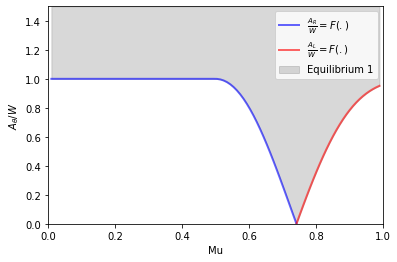

In [852]:
plt.plot(x, C1R, 'b-', lw=2, alpha=0.6, label=r'$\frac{A_{R}}{W}=F(.)$')
plt.plot(x, C1L, 'r-', lw=2, alpha=0.6, label=r'$\frac{A_{L}}{W}=F(.)$')
plt.xlim((0,1))
plt.ylim((0, 1.5))
plt.xlabel('Mu')
plt.ylabel(r'$A_\theta/W$')
max_y = np.max([C1R, C1L], axis=0)
plt.fill_between(x, max_y, 1.5, color='gray', alpha=0.3, label='Equilibrium 1')
plt.legend()

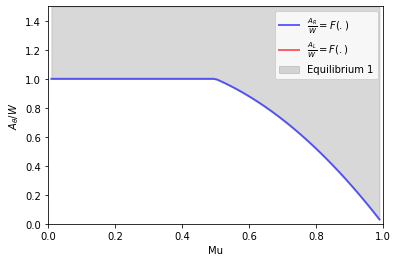

In [853]:
C1Rb = 1 - 2*beta.cdf(cond1R, 1, 1)
C1Lb = 2*beta.cdf(cond1L, 1, 1) - 1

plt.plot(x, C1Rb, 'b-', lw=2, alpha=0.6, label=r'$\frac{A_{R}}{W}=F(.)$')
plt.plot(x, C1Lb, 'r-', lw=2, alpha=0.6, label=r'$\frac{A_{L}}{W}=F(.)$')
plt.xlim((0,1))
plt.ylim((0, 1.5))
plt.xlabel('Mu')
plt.ylabel(r'$A_\theta/W$')
max_y = np.max([C1Rb, C1Lb], axis=0)
plt.fill_between(x, max_y, 1.5, color='gray', alpha=0.3, label='Equilibrium 1')
plt.legend()

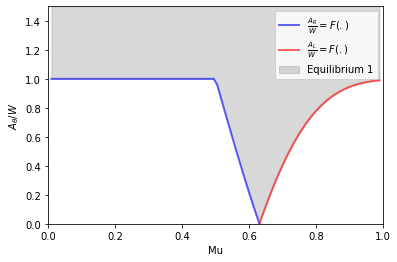

In [854]:
#Beta shape parameters a = 1, b = 8

C1Rb = 1 - 2*beta.cdf(cond1R, 1, 8)
C1Lb = 2*beta.cdf(cond1L, 1, 8) - 1

plt.plot(x, C1Rb, 'b-', lw=2, alpha=0.6, label=r'$\frac{A_{R}}{W}=F(.)$')
plt.plot(x, C1Lb, 'r-', lw=2, alpha=0.6, label=r'$\frac{A_{L}}{W}=F(.)$')
plt.xlim((0,1))
plt.ylim((0, 1.5))
plt.xlabel('Mu')
plt.ylabel(r'$A_\theta/W$')
max_y = np.max([C1Rb, C1Lb], axis=0)
plt.fill_between(x, max_y, 1.5, color='gray', alpha=0.3, label='Equilibrium 1')
plt.legend()

Text(0, 0.5, 'p')

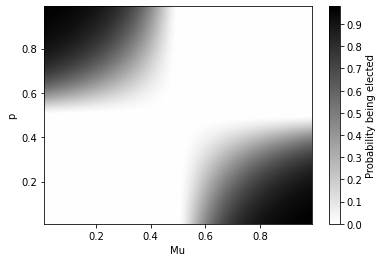

In [855]:
plt.contourf(X,Y,beta.cdf(function_2(X,Y), a, b), levels=100, cmap='binary')
plt.colorbar(label='Probability being elected')
plt.xlabel('Mu')
plt.ylabel('p')

Text(0, 0.5, 'p')

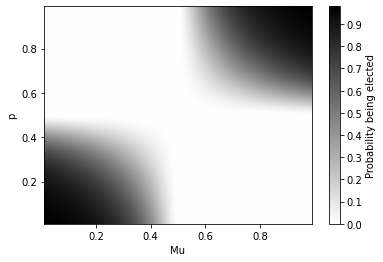

In [856]:
plt.contourf(X,Y,beta.cdf(function_3(X,Y), a, b), levels=100, cmap='binary')
plt.colorbar(label='Probability being elected')
plt.xlabel('Mu')
plt.ylabel('p')

Text(0, 0.5, 'p')

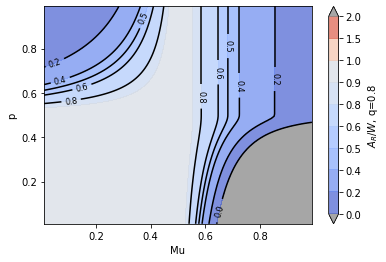

In [857]:
levels = [0, .2, .4, .5, .6, .8, .9, 1, 1.5, 2]

q = 0.8

C3R = 1 - beta.cdf(function_2(X,Y), a, b) - beta.cdf(function_3(X,q), a, b)
C3L = beta.cdf(function_2(X,Y), a, b) + beta.cdf(function_3(X,q), a, b) - 1

cs = plt.contourf(X,Y,C3R, levels, cmap='coolwarm', alpha = 0.7, extend='both')
cs.cmap.set_under('gray')
cs.cmap.set_over('gray')
cs2 = plt.contour(X,Y,C3R, levels = levels1, colors = 'black')
plt.clabel(cs2, fmt='%1.1f', fontsize=8)
plt.colorbar(cs, label='$A_R/W$, q=%1.1f' %q)
plt.xlabel('Mu')
plt.ylabel('p')

Text(0, 0.5, 'p')

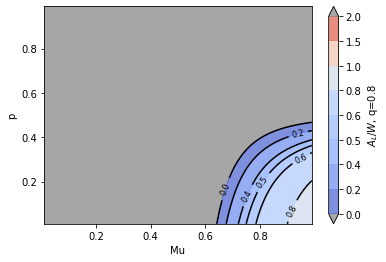

In [872]:
q = 0.8

C3R = 1 - beta.cdf(function_2(X,Y), a, b) - beta.cdf(function_3(X,q), a, b)
C3L = beta.cdf(function_2(X,Y), a, b) + beta.cdf(function_3(X,q), a, b) - 1

cs = plt.contourf(X,Y,C3L, levels = levels1, cmap='coolwarm', alpha = 0.7, extend='both')
cs.cmap.set_under('gray')
cs.cmap.set_over('gray')
cs2 = plt.contour(X,Y,C3L, levels = levels1, colors = 'black')
plt.clabel(cs2, fmt='%1.1f', fontsize=8)
plt.colorbar(cs, label='$A_L/W$, q=%1.1f' %q)
plt.xlabel('Mu')
plt.ylabel('p')

Text(0, 0.5, 'p')

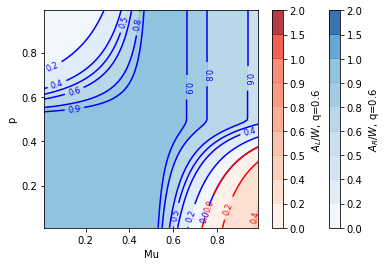

In [874]:
q = 0.6

C3R = 1 - beta.cdf(function_2(X,Y), a, b) - beta.cdf(function_3(X,q), a, b)
C3L = beta.cdf(function_2(X,Y), a, b) + beta.cdf(function_3(X,q), a, b) - 1

cs = plt.contourf(X,Y,C3R, levels, cmap='Blues', alpha = 0.8)
plt.colorbar(cs, label='$A_R/W$, q=%1.1f' %q)
cs1 = plt.contour(X,Y,C3R, levels, colors = 'blue')
plt.clabel(cs1, fmt='%1.1f', fontsize=8)

cs2 = plt.contourf(X,Y,C3L, levels, cmap='Reds', alpha = 0.8)
plt.colorbar(cs2, label='$A_L/W$, q=%1.1f' %q)
cs3 = plt.contour(X,Y,C3L, levels, colors = 'red')
cs3.cmap.set_under('red')
plt.clabel(cs3, fmt='%1.1f', fontsize=8)
plt.xlabel('Mu')
plt.ylabel('p')

Text(0, 0.5, 'p')

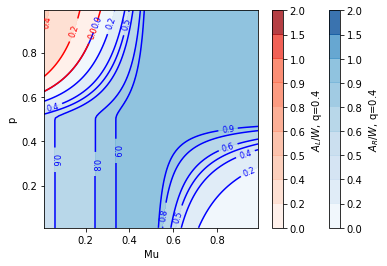

In [875]:
q = 0.4

C3R = 1 - beta.cdf(function_2(X,Y), a, b) - beta.cdf(function_3(X,q), a, b)
C3L = beta.cdf(function_2(X,Y), a, b) + beta.cdf(function_3(X,q), a, b) - 1

cs = plt.contourf(X,Y,C3R, levels, cmap='Blues', alpha = 0.8)
plt.colorbar(cs, label='$A_R/W$, q=%1.1f' %q)
cs1 = plt.contour(X,Y,C3R, levels, colors = 'blue')
plt.clabel(cs1, fmt='%1.1f', fontsize=8)

cs2 = plt.contourf(X,Y,C3L, levels, cmap='Reds', alpha = 0.8)
plt.colorbar(cs2, label='$A_L/W$, q=%1.1f' %q)
cs3 = plt.contour(X,Y,C3L, levels, colors = 'red')
cs3.cmap.set_under('red')
plt.clabel(cs3, fmt='%1.1f', fontsize=8)
plt.xlabel('Mu')
plt.ylabel('p')

<ipython-input-876-b67a2adc5408>:13: UserWarning: No contour levels were found within the data range.
  cs3 = plt.contour(X,Y,C3L, levels, colors = 'red')


Text(0, 0.5, 'p')

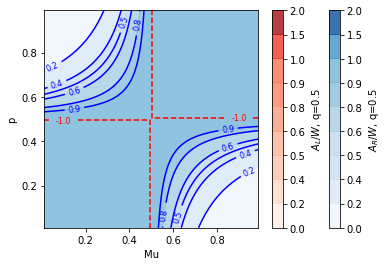

In [876]:
q = 0.5

C3R = 1 - beta.cdf(function_2(X,Y), a, b) - beta.cdf(function_3(X,q), a, b)
C3L = beta.cdf(function_2(X,Y), a, b) + beta.cdf(function_3(X,q), a, b) - 1

cs = plt.contourf(X,Y,C3R, levels, cmap='Blues', alpha = 0.8)
plt.colorbar(cs, label='$A_R/W$, q=%1.1f' %q)
cs1 = plt.contour(X,Y,C3R, levels, colors = 'blue')
plt.clabel(cs1, fmt='%1.1f', fontsize=8)

cs2 = plt.contourf(X,Y,C3L, levels, cmap='Reds', alpha = 0.8)
plt.colorbar(cs2, label='$A_L/W$, q=%1.1f' %q)
cs3 = plt.contour(X,Y,C3L, levels, colors = 'red')
cs3.cmap.set_under('red')
plt.clabel(cs3, fmt='%1.1f', fontsize=8)
plt.xlabel('Mu')
plt.ylabel('p')

Text(0, 0.5, 'p')

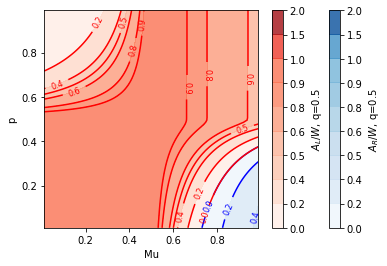

In [877]:
z = 0.6

C4L = 1 - beta.cdf(function_2(X,Y), a, b) - beta.cdf(function_3(X,z), a, b)
C4R = beta.cdf(function_2(X,Y), a, b) + beta.cdf(function_3(X,z), a, b) - 1

cs = plt.contourf(X,Y,C4R, levels, cmap='Blues', alpha = 0.8)
plt.colorbar(cs, label='$A_R/W$, q=%1.1f' %q)
cs1 = plt.contour(X,Y,C4R, levels, colors = 'blue')
plt.clabel(cs1, fmt='%1.1f', fontsize=8)

cs2 = plt.contourf(X,Y,C4L, levels, cmap='Reds', alpha = 0.8)
plt.colorbar(cs2, label='$A_L/W$, q=%1.1f' %q)
cs3 = plt.contour(X,Y,C4L, levels, colors = 'red')
cs3.cmap.set_under('red')
plt.clabel(cs3, fmt='%1.1f', fontsize=8)
plt.xlabel('Mu')
plt.ylabel('p')

Text(0, 0.5, 'p')

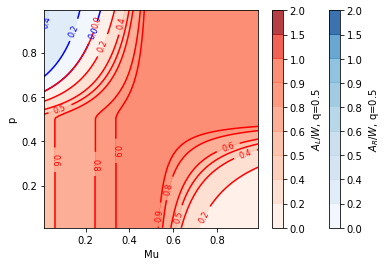

In [878]:
z = 0.4

C4L = 1 - beta.cdf(function_2(X,Y), a, b) - beta.cdf(function_3(X,z), a, b)
C4R = beta.cdf(function_2(X,Y), a, b) + beta.cdf(function_3(X,z), a, b) - 1

cs = plt.contourf(X,Y,C4R, levels, cmap='Blues', alpha = 0.8)
plt.colorbar(cs, label='$A_R/W$, q=%1.1f' %q)
cs1 = plt.contour(X,Y,C4R, levels, colors = 'blue')
plt.clabel(cs1, fmt='%1.1f', fontsize=8)

cs2 = plt.contourf(X,Y,C4L, levels, cmap='Reds', alpha = 0.8)
plt.colorbar(cs2, label='$A_L/W$, q=%1.1f' %q)
cs3 = plt.contour(X,Y,C4L, levels, colors = 'red')
cs3.cmap.set_under('red')
plt.clabel(cs3, fmt='%1.1f', fontsize=8)
plt.xlabel('Mu')
plt.ylabel('p')

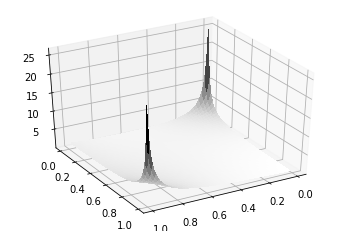

In [820]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X,Y,cond3R, cmap='binary',
                       linewidth=0, antialiased=False)
ax.view_init(elev=35, azim=60)

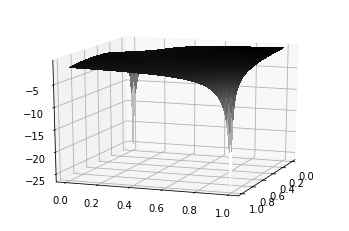

In [821]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X,Y,cond3L, cmap='binary',
                       linewidth=0, antialiased=False)
ax.view_init(elev=15, azim=20)